In [1]:
# Seed
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
VOCROOTDIR = "../../data/bmc_label_voc/"

original_image = cv2.imread(VOCROOTDIR + "JPEGImages/0001.jpg")
mask_map = cv2.imread(VOCROOTDIR + "SegmentationClassPNG/0001.png")

In [12]:
mask_map.sum(axis=2)
object_mask = mask_map.sum(axis=2) > 0
object_mask = np.expand_dims(object_mask,axis=2)

In [13]:
masked_image = object_mask * original_image

In [14]:
def show_image(img, title=None):
  plt.figure(figsize=(10,5))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  if title:
    plt.title(title, fontsize=14)

  plt.show()

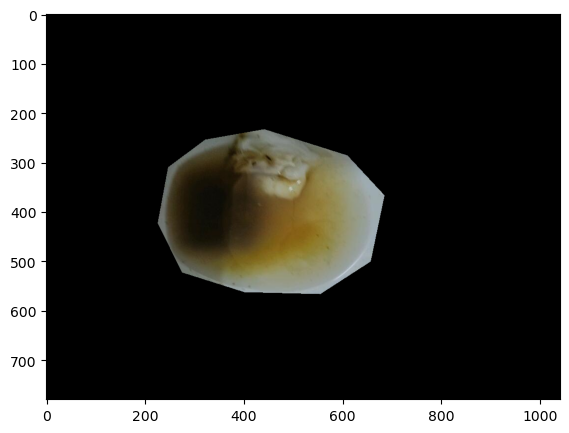

In [15]:
show_image(masked_image)

In [18]:
from sklearn.model_selection import train_test_split
from glob import glob
import os
import shutil

In [19]:
VOCROOTDIR = "../../data/bmc_label_voc"
bmc_jpg = sorted(glob(VOCROOTDIR + "/JPEGImages/" + '*.jpg'))
bmc_segpng = sorted(glob(VOCROOTDIR + "/SegmentationClassPNG/" + '*.png'))

In [17]:
SAVEDIR = "../../data/bmc_label_voc/SegmentationMaskedJPG/"
os.makedirs(SAVEDIR, exist_ok=True)

In [22]:
for i,j in zip(bmc_jpg,bmc_segpng):
    dir = SAVEDIR+ i[-8:]

    original_image = cv2.imread(i)
    mask_map = cv2.imread(j)
    mask_map.sum(axis=2)
    object_mask = mask_map.sum(axis=2) > 0
    object_mask = np.expand_dims(object_mask,axis=2)
    masked_image = object_mask * original_image

    cv2.imwrite(dir, masked_image)

KeyboardInterrupt: 

In [7]:
data_train, data_val, labels_train, labels_val \
    = train_test_split(bmc_jpg, bmc_segpng, test_size=0.20, random_state=1998)


In [9]:
for idx, _dir in enumerate(["/train","/val"]):
    if idx == 0: #train

    else: #val
        for i,j in zip(data_val,labels_val):
            dir = SAVEDIR + _name[0] + "/val/"+ i[-8:]
            original_image = cv2.imread(i)
            mask_map = cv2.imread(j)
            mask_map.sum(axis=2)
            object_mask = mask_map.sum(axis=2) > 0
            object_mask = np.expand_dims(object_mask,axis=2)
            masked_image = object_mask * original_image
            cv2.imwrite(dir, masked_image)